In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.misc import derivative
import cmath
import time

In [152]:
a = 1
b = 2
n5 = 5
n10 = 27
n20 = 200
n40 = 400
n80 = 800
n160 = 1600
p = 1
x0 = a
y0 = 0

In [153]:
x_real = np.linspace(a, b, 1000)
y_real = [math.sin(math.pi * i) for i in x_real]

In [154]:
def fi(x):
    return math.sin(math.pi * x)

In [155]:
def f(x, y):
    dx = 1e-5
    return derivative(fi,x,dx) + p * ( y - fi(x))**3

In [156]:
#Неявный метод Эйлера

In [157]:
def emethod(xnew, y, ynew, h):
    return y + h * f(xnew, ynew) - ynew

In [158]:
def Euler(a, b, x0, y0, n, p):
    x = x0
    h = (b - a) / n
    y = y0
    x_for_graph = [x0]
    y_for_graph = [y0]
    while x < b:
        x = x + h
        x_for_graph.append(x)
        #переменные для решения уравнения
        a0 = -10
        b0 = 10
        y1 = complex(a0, 0)
        y2 = complex((a0 + b0) / 2, 0)
        y3 = complex(b0, 0)
        eps = 1e-5
        #решение уравнения методом секущих
        while abs(y2 - y1) > eps:
            y3 = y2 - (emethod(x, y, y2, h) * (y2 - y1)) / (emethod(x, y, y2, h) - emethod(x, y, y1, h))
            y1 = y2
            y2 = y3
        #определение нового y
        y = y2
        y_for_graph.append(y)
    return x_for_graph, y_for_graph
        

In [159]:
start_time = time.time()
x_euler_5, y_euler_5 = Euler(a, b, x0, y0, n160, p)
print("Время для ", n5)
print("--- %s seconds ---" % (time.time() - start_time))
x_euler_10, y_euler_10 = Euler(a, b, x0, y0, n10, p)
x_euler_20, y_euler_20 = Euler(a, b, x0, y0, n20, p)

C:\Users\monte\AppData\Local\Temp\ipykernel_3912\2877669525.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(fi,x,dx) + p * ( y - fi(x))**3


Время для  5
--- 0.5572042465209961 seconds ---


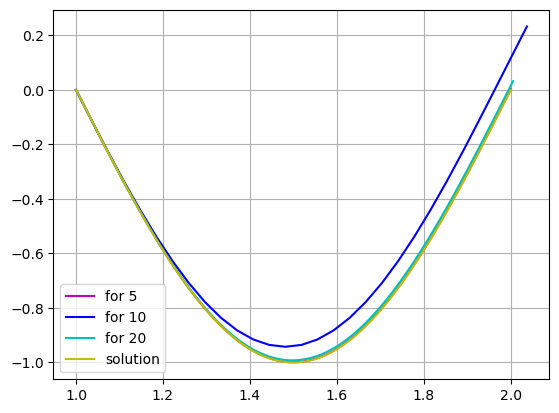

In [160]:
fig = plt.subplots()
plt.plot(x_euler_5,y_euler_5, 'm', label = 'for 5')
plt.plot(x_euler_10,y_euler_10, 'b', label = 'for 10')
plt.plot(x_euler_20,y_euler_20, 'c', label = 'for 20')
plt.plot(x_real,y_real, 'y', label = 'solution')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
#Найдем порядок сходимости
x_euler_40, y_euler_40 = Euler(a, b, x0, y0, n40, p)
x_euler_80, y_euler_80 = Euler(a, b, x0, y0, n80, p)
x_euler_160, y_euler_160 = Euler(a, b, x0, y0, n160, p)

C:\Users\monte\AppData\Local\Temp\ipykernel_3912\2877669525.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(fi,x,dx) + p * ( y - fi(x))**3


In [162]:
y_real_for_err5 = [math.sin(math.pi * i) for i in x_euler_5]
err5 = 0
for i in range(np.size(y_euler_5) - 1):
    if (err5 < abs(y_euler_5[i] - y_real_for_err5[i])):
        err5 = abs(y_euler_5[i] - y_real_for_err5[i])
print("err5 = ",err5)

y_real_for_err10 = [math.sin(math.pi * i) for i in x_euler_10]
err10 = 0
for i in range(np.size(y_euler_10) - 1):
    if (err10 < abs(y_euler_10[i] - y_real_for_err10[i])):
        err10 = abs(y_euler_10[i] - y_real_for_err10[i])
print("err10 = ",err10)

y_real_for_err20 = [math.sin(math.pi * i) for i in x_euler_20]
err20 = 0
for i in range(np.size(y_euler_20) - 1):
    if (err20 < abs(y_euler_20[i] - y_real_for_err20[i])):
        err20 = abs(y_euler_20[i] - y_real_for_err20[i])
print("err20 = ",err20)

y_real_for_err40 = [math.sin(math.pi * i) for i in x_euler_40]
err40 = 0
for i in range(np.size(y_euler_40) - 1):
    if (err40 < abs(y_euler_40[i] - y_real_for_err40[i])):
        err40 = abs(y_euler_40[i] - y_real_for_err40[i])
print("err40 = ",err40)

y_real_for_err80 = [math.sin(math.pi * i) for i in x_euler_80]
err80 = 0
for i in range(np.size(y_euler_80) - 1):
    if (err80 < abs(y_euler_80[i] - y_real_for_err80[i])):
        err80 = abs(y_euler_80[i] - y_real_for_err80[i])
print("err80 = ",err80)

y_real_for_err160 = [math.sin(math.pi * i) for i in x_euler_160]
err160 = 0
for i in range(np.size(y_euler_160) - 1):
    if (err160 < abs(y_euler_160[i] - y_real_for_err160[i])):
        err160 = abs(y_euler_160[i] - y_real_for_err160[i])
print("err160 = ",err160)

print("err5 / err10 = ",err5/err10)
print("err10 / err20 = ",err10/err20)
print("err20 / err40 = ",err20/err40)
print("err40 / err80 = ",err40/err80)
print("err80 / err160 = ",err80/err160)
print("Порядок сходимости: ", math.log2(err5/err10))
print("Порядок сходимости: ", math.log2(err10/err20))
print("Порядок сходимости: ", math.log2(err20/err40))
print("Порядок сходимости: ", math.log2(err40/err80))
print("Порядок сходимости: ", math.log2(err80/err160))

err5 =  0.0019634954027451593
err10 =  0.11689074049151923
err20 =  0.015710364995347146
err40 =  0.007854181907328799
err80 =  0.00392701114164132
err160 =  0.0019634954027451593
err5 / err10 =  0.016797698384737467
err10 / err20 =  7.440358039175928
err20 / err40 =  2.000254791741923
err40 / err80 =  2.000040647719194
err80 / err160 =  2.000010357116688
Порядок сходимости:  -5.895592620842344
Порядок сходимости:  2.8953720472627493
Порядок сходимости:  1.0001837816850006
Порядок сходимости:  1.0000293208334972
Порядок сходимости:  1.000007471061097


In [163]:
#Метод Рунге-Кутты четвертого порядка

In [164]:
def RK(a, b, x0, y0, n, p):
    x = x0
    h = (b - a) / n
    y = y0
    x_for_graph = [x0]
    y_for_graph = [y0]
    while x < b:
        k1 = h * f(x, y)
        k2 = h * f(x + h / 2, y + k1 / 2)
        k3 = h * f(x + h / 2, y + k2 / 2)
        k4 = h * f(x + h, y + k3)
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x = x + h
        x_for_graph.append(x)
        y_for_graph.append(y)
    return x_for_graph, y_for_graph

In [165]:
start_time = time.time()
x_RK_5, y_RK_5 = RK(a, b, x0, y0, n5, p)
print("Время для ", n5)
print("--- %s seconds ---" % (time.time() - start_time))
t = (time.time() - start_time)
x_RK_10, y_RK_10 = RK(a, b, x0, y0, n10, p)
x_RK_20, y_RK_20 = RK(a, b, x0, y0, n20, p)

Время для  5
--- 0.0019981861114501953 seconds ---


C:\Users\monte\AppData\Local\Temp\ipykernel_3912\2877669525.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(fi,x,dx) + p * ( y - fi(x))**3


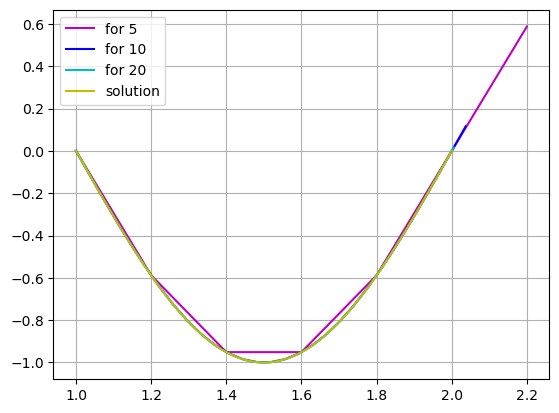

In [166]:
fig = plt.subplots()
plt.plot(x_RK_5,y_RK_5, 'm', label = 'for 5')
plt.plot(x_RK_10,y_RK_10, 'b', label = 'for 10')
plt.plot(x_RK_20,y_RK_20, 'c', label = 'for 20')
plt.plot(x_real,y_real, 'y', label = 'solution')
plt.legend()
plt.grid(True)
plt.show()

In [167]:
#Найдем порядок сходимости
x_RK_40, y_RK_40 = RK(a, b, x0, y0, n40, p)
x_RK_80, y_RK_80 = RK(a, b, x0, y0, n80, p)
x_RK_160, y_RK_160 = RK(a, b, x0, y0, n160, p)

C:\Users\monte\AppData\Local\Temp\ipykernel_3912\2877669525.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(fi,x,dx) + p * ( y - fi(x))**3


In [168]:
y_real_for_err5 = [math.sin(math.pi * i) for i in x_RK_5]
err5 = 0
for i in range(np.size(y_RK_5) - 1):
    if (err5 < abs(y_RK_5[i] - y_real_for_err5[i])):
        err5 = abs(y_RK_5[i] - y_real_for_err5[i])
print("err5 = ",err5)

y_real_for_err10 = [math.sin(math.pi * i) for i in x_RK_10]
err10 = 0
for i in range(np.size(y_RK_10) - 1):
    if (err10 < abs(y_RK_10[i] - y_real_for_err10[i])):
        err10 = abs(y_RK_10[i] - y_real_for_err10[i])
print("err10 = ",err10)

y_real_for_err20 = [math.sin(math.pi * i) for i in x_RK_20]
err20 = 0
for i in range(np.size(y_RK_20) - 1):
    if (err20 < abs(y_RK_20[i] - y_real_for_err20[i])):
        err20 = abs(y_RK_20[i] - y_real_for_err20[i])
print("err20 = ",err20)

y_real_for_err40 = [math.sin(math.pi * i) for i in x_RK_40]
err40 = 0
for i in range(np.size(y_RK_40) - 1):
    if (err40 < abs(y_RK_40[i] - y_real_for_err40[i])):
        err40 = abs(y_RK_40[i] - y_real_for_err40[i])
print("err40 = ",err40)

y_real_for_err80 = [math.sin(math.pi * i) for i in x_RK_80]
err80 = 0
for i in range(np.size(y_RK_80) - 1):
    if (err80 < abs(y_RK_80[i] - y_real_for_err80[i])):
        err80 = abs(y_RK_80[i] - y_real_for_err80[i])
print("err80 = ",err80)

y_real_for_err160 = [math.sin(math.pi * i) for i in x_RK_160]
err160 = 0
for i in range(np.size(y_RK_160) - 1):
    if (err160 < abs(y_RK_160[i] - y_real_for_err160[i])):
        err160 = abs(y_RK_160[i] - y_real_for_err160[i])
print("err160 = ",err160)

print("err5 / err10 = ",err5/err10)
print("err10 / err20 = ",err10/err20)
print("err20 / err40 = ",err20/err40)
print("err40 / err80 = ",err40/err80)
print("err80 / err160 = ",err80/err160)
print("Порядок сходимости: ", math.log2(err5/err10))
print("Порядок сходимости: ", math.log2(err10/err20))
print("Порядок сходимости: ", math.log2(err20/err40))
print("Порядок сходимости: ", math.log2(err40/err80))
print("Порядок сходимости: ", math.log2(err80/err160))

err5 =  5.119000772324522e-05
err10 =  6.339313285419479e-08
err20 =  1.3658874031818868e-10
err40 =  1.566340390724008e-10
err80 =  1.5782375406558913e-10
err160 =  1.580829911418391e-10
err5 / err10 =  807.5008351611689
err10 / err20 =  464.11682768666043
err20 / err40 =  0.8720246322388034
err40 / err80 =  0.9924617494987865
err80 / err160 =  0.9983601203748899
Порядок сходимости:  9.657319941695533
Порядок сходимости:  8.858344196655754
Порядок сходимости:  -0.19755920723968404
Порядок сходимости:  -0.010916594517730683
Порядок сходимости:  -0.002367788177653693


In [145]:
#Метод Адамса четвертого порядка

In [146]:
def Adams(a, b, x0, y0, n, p):
    x = x0
    h = (b - a) / n
    y = y0
    x_for_graph = [x0]
    y_for_graph = [y0]
    #первые точки из метода Рунге-Кутты
    x = x + h
    x_for_graph.append(x)
    X, Y = RK(a, b, x0, y0, n, p)
    y_for_graph.append(Y[1])
    x = x + h
    x_for_graph.append(x)
    y_for_graph.append(Y[2])
    x = x + h
    x_for_graph.append(x)
    y_for_graph.append(Y[3])
    #start_time = time.time()
    while x < b:
        x = x + h
        y = y_for_graph[np.size(y_for_graph) - 1] + h / 24 * (55 * f(x_for_graph[np.size(x_for_graph) - 1], y_for_graph[np.size(y_for_graph) - 1]) - 59 * f(x_for_graph[np.size(x_for_graph) - 2], y_for_graph[np.size(y_for_graph) - 2]) + 37 * f(x_for_graph[np.size(x_for_graph) - 3], y_for_graph[np.size(y_for_graph) - 3]) - 9 * f(x_for_graph[np.size(x_for_graph) - 4], y_for_graph[np.size(y_for_graph) - 4]))
        y_for_graph.append(y)
        x_for_graph.append(x)
    return x_for_graph, y_for_graph

In [151]:
start_time = time.time()
x_Adams_5, y_Adams_5 = Adams(a, b, x0, y0, n10, p)
print("Время для ", n5)
print("--- %s seconds ---" % (time.time() - start_time - t))
x_Adams_10, y_Adams_10 = Adams(a, b, x0, y0, n10, p)
x_Adams_20, y_Adams_20 = Adams(a, b, x0, y0, n20, p)

Время для  50
--- -0.0034880638122558594 seconds ---


C:\Users\monte\AppData\Local\Temp\ipykernel_3912\2877669525.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(fi,x,dx) + p * ( y - fi(x))**3


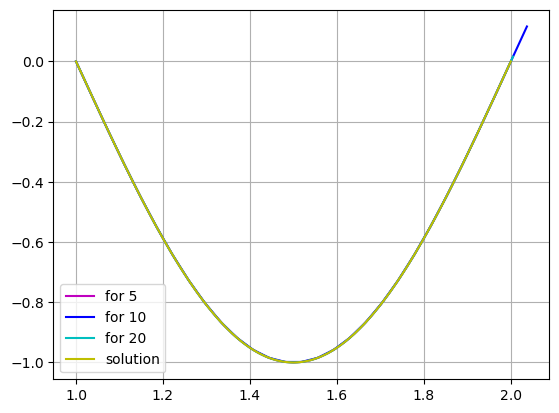

In [148]:
fig = plt.subplots()
plt.plot(x_Adams_5,y_Adams_5, 'm', label = 'for 5')
plt.plot(x_Adams_10,y_Adams_10, 'b', label = 'for 10')
plt.plot(x_Adams_20,y_Adams_20, 'c', label = 'for 20')
plt.plot(x_real,y_real, 'y', label = 'solution')
plt.legend()
plt.grid(True)
plt.show()

In [149]:
#Найдем порядок сходимости
x_Adams_10, y_Adams_10 = Adams(a, b, x0, y0, n10, p)
#x_Adams_80, y_Adams_80 = Adams(a, b, x0, y0, n80, p)
#x_Adams_160, y_Adams_160 = Adams(a, b, x0, y0, n160, p)

C:\Users\monte\AppData\Local\Temp\ipykernel_3912\2877669525.py:3: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  return derivative(fi,x,dx) + p * ( y - fi(x))**3


In [150]:
#y_real_for_err5 = [math.sin(math.pi * i) for i in x_Adams_5]
#err5 = 0
#for i in range(np.size(y_Adams_5) - 1):
 #   if (err5 < abs(y_Adams_5[i] - y_real_for_err5[i])):
  #      err5 = abs(y_Adams_5[i] - y_real_for_err5[i])
#print("err5 = ",err5)

y_real_for_err10 = [math.sin(math.pi * i) for i in x_Adams_10]
err10 = 0
for i in range(np.size(y_Adams_10) - 1):
    if (err10 < abs(y_Adams_10[i] - y_real_for_err10[i])):
        err10 = abs(y_Adams_10[i] - y_real_for_err10[i])
print("err10 = ",err10)

#y_real_for_err20 = [math.sin(math.pi * i) for i in x_Adams_20]
#err20 = 0
#for i in range(np.size(y_Adams_20) - 1):
 #   if (err20 < abs(y_Adams_20[i] - y_real_for_err20[i])):
 #       err20 = abs(y_Adams_20[i] - y_real_for_err20[i])
#print("err20 = ",err20)

#y_real_for_err40 = [math.sin(math.pi * i) for i in x_Adams_40]
#err40 = 0
#for i in range(np.size(y_Adams_40) - 1):
 #   if (err40 < abs(y_Adams_40[i] - y_real_for_err40[i])):
  #      err40 = abs(y_Adams_40[i] - y_real_for_err40[i])
#print("err40 = ",err40)

#y_real_for_err80 = [math.sin(math.pi * i) for i in x_Adams_80]
#err80 = 0
#for i in range(np.size(y_Adams_80) - 1):
 #   if (err80 < abs(y_Adams_80[i] - y_real_for_err80[i])):
  #      err80 = abs(y_Adams_80[i] - y_real_for_err80[i])
#print("err80 = ",err80)

#y_real_for_err160 = [math.sin(math.pi * i) for i in x_Adams_160]
#err160 = 0
#for i in range(np.size(y_Adams_160) - 1):
 #   if (err160 < abs(y_Adams_160[i] - y_real_for_err160[i])):
  #      err160 = abs(y_Adams_160[i] - y_real_for_err160[i])
#print("err160 = ",err160)

#print("err5 / err10 = ",err5/err10)
#print("err10 / err20 = ",err10/err20)
#print("err20 / err40 = ",err20/err40)
#print("err40 / err80 = ",err40/err80)
#print("err80 / err160 = ",err80/err160)
#print("Порядок сходимости: ", math.log2(err5/err10))
#print("Порядок сходимости: ", math.log2(err10/err20))
#print("Порядок сходимости: ", math.log2(err20/err40))
#print("Порядок сходимости: ", math.log2(err40/err80))
#print("Порядок сходимости: ", math.log2(err80/err160))

err10 =  5.309422209931469e-05
